In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib2tikz
from isaac.constants import FORCE_CLASS_COLS, MASS_CLASS_COLS, BASIC_TRAINING_COLS, PUCK_SQUARE_DISTANCES, PUCK_ANGLE_FEATURES
from isaac.training import evaluate_saved_model

In [2]:
sns.set_style("whitegrid")
sns.set_context("paper")
plt.rcParams.update({'axes.labelsize': '22',
                     'xtick.labelsize':'18',
                     'ytick.labelsize': '18',
                     'legend.fontsize': '18',
                     'figure.figsize': (8, 8),
                     'font.size': 22})

def increase_linewidth(ax):
    lines = ax.get_lines()
    for line in lines:
        line.set_linewidth(3)
    leg = ax.legend()
    leg_lines = leg.get_lines()
    plt.setp(leg_lines, linewidth=5)

In [3]:
question_type = "mass"
directory = "yoked_mixed_plots/"
stats = pd.read_hdf(directory+"stats.h5")

In [4]:
stats.head()

,Epoch,Mass Loss,Force Loss,Mass Train Accuracy,Mass Val Accuracy,Force Train Accuracy,Force Val Accuracy,seed
0,0,1.102813,1.105395,33.08,29.133858,34.60,30.708661,0
1,1,1.100708,1.098914,35.24,32.283465,35.28,27.559055,0
2,2,1.098431,1.090293,37.72,32.283465,42.24,31.496063,0
3,3,1.095147,1.053876,36.40,33.858268,48.12,30.708661,0
4,4,1.095424,1.028132,37.16,33.858268,48.52,30.708661,0


/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


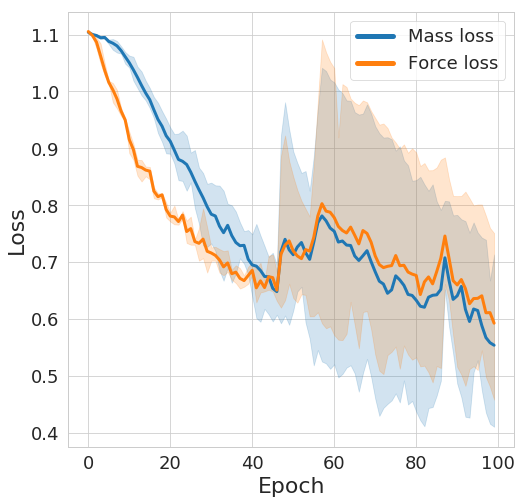

In [5]:
ax = sns.lineplot(x="Epoch", y="Mass Loss", markers=True, data=stats, linewidth=3, label="Mass loss")
ax = sns.lineplot(x="Epoch", y="Force Loss", markers=True, data=stats, linewidth=3, label="Force loss")
increase_linewidth(ax)
plt.ylabel("Loss")
plt.savefig(directory+"losses.pdf")

/home/hector/miniconda3/envs/diss/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


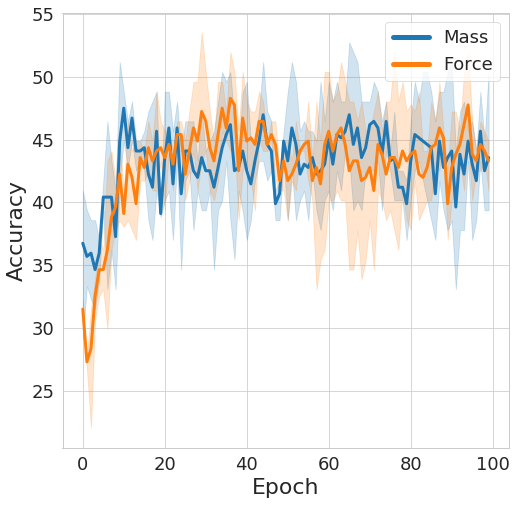

In [6]:
ax = sns.lineplot(x="Epoch", y="Mass Val Accuracy", data=stats, label="Mass")
ax = sns.lineplot(x="Epoch", y="Force Val Accuracy", data=stats, label="Force")
plt.legend()
plt.ylabel("Accuracy")
increase_linewidth(ax)
plt.savefig(directory+"accuracies.pdf")